# PREREQUISITES



## Importing Required Libraries

In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
import warnings
warnings.filterwarnings('ignore')

## Loading Datasets

In [2]:

deliveries = pd.read_csv("deliveries.csv")

matches = pd.read_csv("matches.csv")

In [3]:
deliveries.shape

(11472, 22)

In [4]:
matches.shape

(52, 18)

# Matches Analysis

## Teams with Most number of wins

Teams with the most wins: South Africa, India (8 wins)


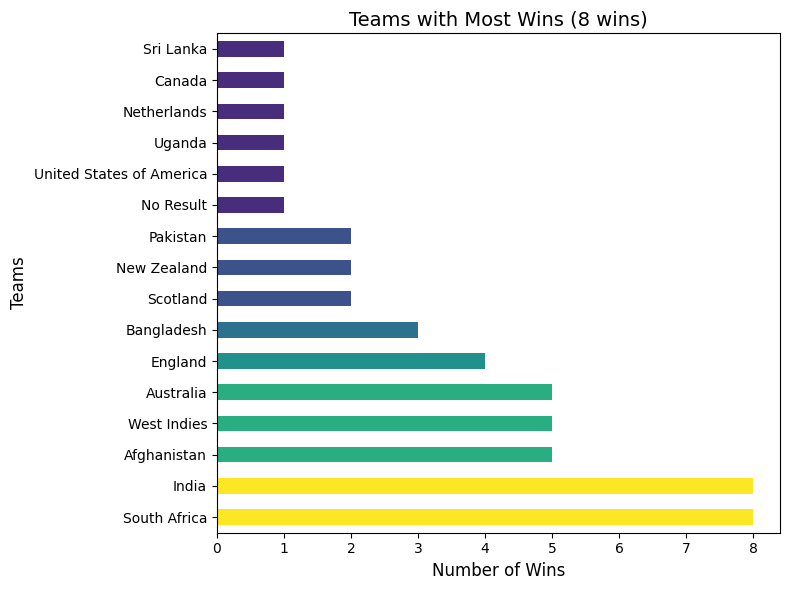

In [5]:
win_counts = matches['winner'].value_counts()

max_wins = win_counts.max()
teams_with_most_wins = win_counts[win_counts == max_wins].index.tolist()

teams_str = ", ".join(teams_with_most_wins)
print(f"Teams with the most wins: {teams_str} ({max_wins} wins)")

plt.figure(figsize=(8, 6))
bars = win_counts.plot(kind='barh', color=plt.cm.viridis(win_counts / max_wins))  

# Set the title and labels
plt.title(f'Teams with Most Wins ({max_wins} wins)', fontsize=14)
plt.xlabel('Number of Wins', fontsize=12)
plt.ylabel('Teams', fontsize=12)

plt.tight_layout()
plt.show()

## Toss outcome to Winning Ratio

In [6]:
toss_match_outcome = matches[matches['toss_winner'] == matches['winner']]

toss_win_and_match_win_count = toss_match_outcome.shape[0]
total_matches_count = matches.shape[0]

print(f"Toss winner also won the match {toss_win_and_match_win_count} times out of {total_matches_count} matches.")

Toss winner also won the match 26 times out of 52 matches.


## Venue with Highest No. of Wins

In [7]:
venue_wins = matches.groupby('venue')['winner'].value_counts().sort_values(ascending=False)

most_common_venue = venue_wins.idxmax()[0]

print(f"The most common venue for winning: {most_common_venue}")



The most common venue for winning: Nassau County International Cricket Stadium


## Batting or Bowling Descision, (After winning toss)

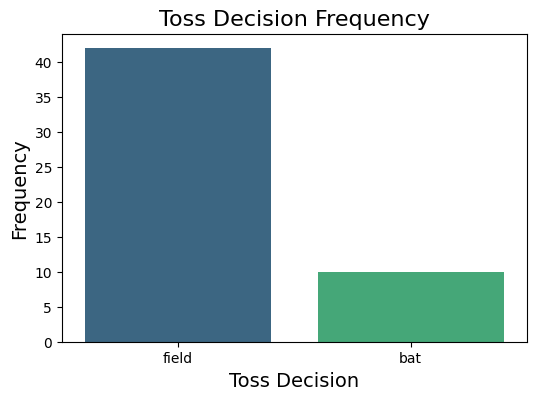

In [8]:
toss_decision_counts = matches['toss_decision'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=toss_decision_counts.index, y=toss_decision_counts.values, palette='viridis')

plt.title('Toss Decision Frequency', fontsize=16)
plt.xlabel('Toss Decision', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.show()

## After winning Toss, Match winning Chances if they choose BAT/FIELD..?

In [9]:
chosen_to_bat = matches[(matches['toss_decision'] == 'bat') & (matches['toss_winner'] == matches['winner'])]
chosen_to_field = matches[(matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])]

batting_win_percentage = (chosen_to_bat.shape[0] / matches.shape[0]) * 100
fielding_win_percentage = (chosen_to_field.shape[0] / matches.shape[0]) * 100

print("After winning Toss, Match Winning Chances, if they choose  : ")

print(f" Bat: {batting_win_percentage:.2f}%")
print(f" Field: {fielding_win_percentage:.2f}%")

After winning Toss, Match Winning Chances, if they choose  : 
 Bat: 9.62%
 Field: 40.38%


# Player Preformence 

## TOP 10 Batsman Of the Tournament

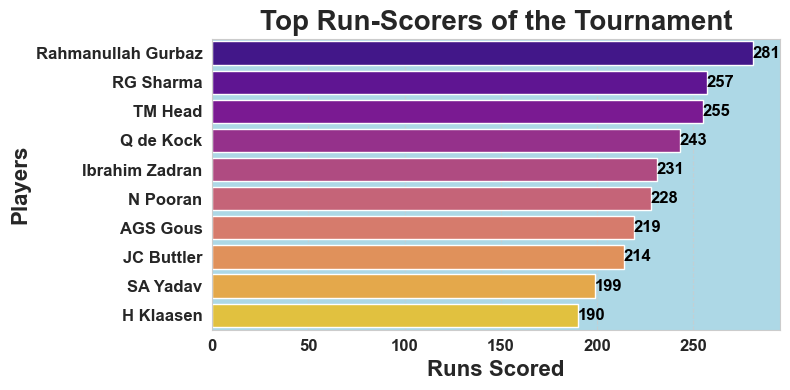

In [10]:
top_run_scorers = deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette='plasma')
plt.title('Top Run-Scorers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_run_scorers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

## TOP 10 Wicket Takers of the Tournament

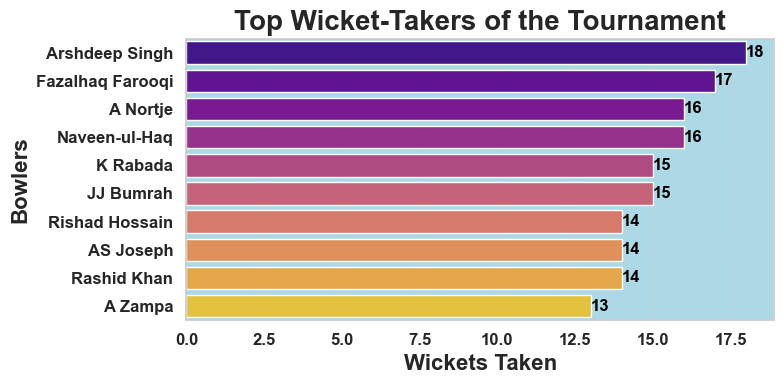

In [11]:
top_wicket_takers = deliveries[deliveries['wicket_type'].notnull()].groupby('bowler').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

barplot = sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='plasma')
plt.title('Top Wicket-Takers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Wickets Taken', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(top_wicket_takers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

## Batsman With Highest Strike Rate

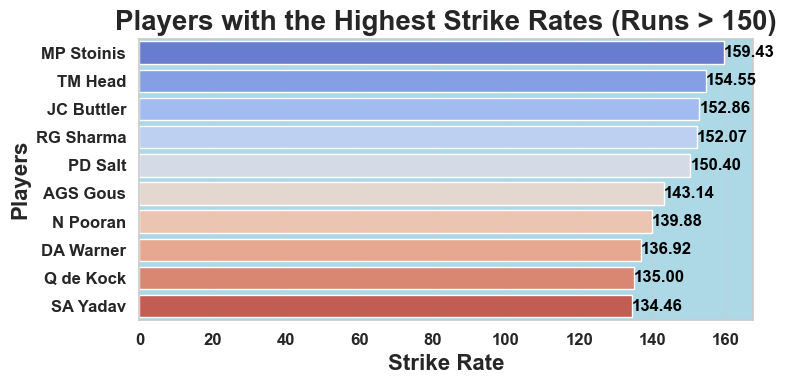

In [12]:
balls_faced = deliveries.groupby('striker').size()
runs_scored = deliveries.groupby('striker')['runs_off_bat'].sum()

strike_rate = (runs_scored / balls_faced) * 100

filtered_strike_rate = strike_rate[runs_scored > 150]

top_strike_rates = filtered_strike_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_strike_rates.values, y=top_strike_rates.index, palette='coolwarm')
plt.title('Players with the Highest Strike Rates (Runs > 150)', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_strike_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

## Bowlers With Best Economy

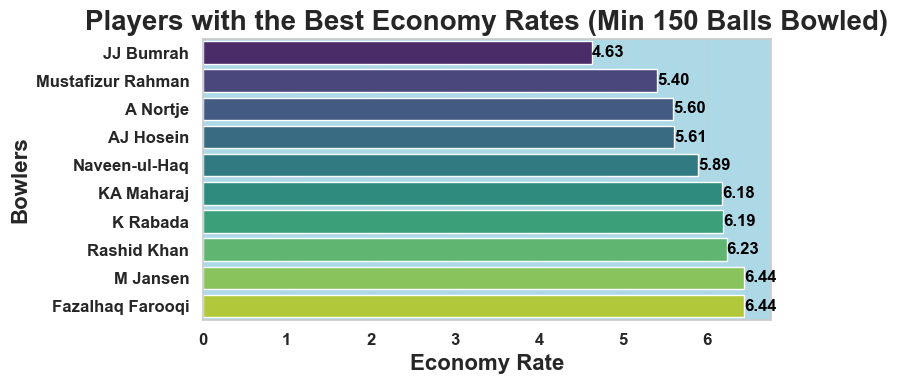

In [13]:
balls_bowled = deliveries.groupby('bowler').size()
runs_conceded = deliveries.groupby('bowler')['runs_off_bat'].sum() + deliveries.groupby('bowler')['extras'].sum()

economy_rate = (runs_conceded / (balls_bowled / 6))

filtered_economy_rate = economy_rate[balls_bowled >= 150]

best_economy_rates = filtered_economy_rate.sort_values().head(10)

plt.figure(figsize=(8, 4))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=best_economy_rates.values, y=best_economy_rates.index, palette='viridis')
plt.title('Players with the Best Economy Rates (Min 150 Balls Bowled)', fontsize=20, weight='bold')
plt.xlabel('Economy Rate', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(best_economy_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

## Consistency In Batting (Playing every match with almost same scores)

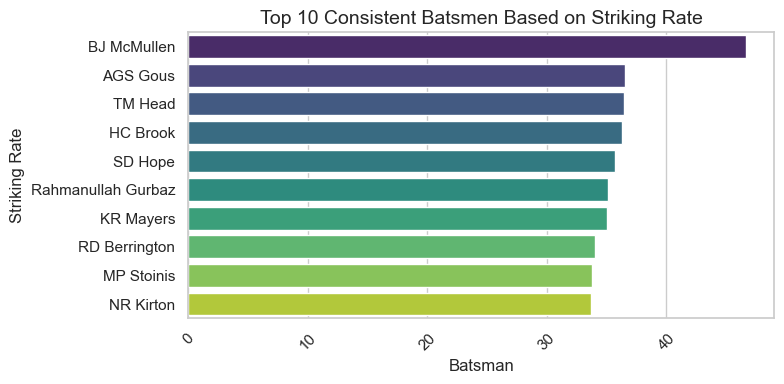

In [14]:

consistent_batsmen = deliveries.groupby(['match_id', 'striker'])['runs_off_bat'].sum().groupby('striker').mean().sort_values(ascending=False).head(10)
consistent_batsmen = consistent_batsmen.reset_index().rename(columns={"striker": "Batsman", "runs_off_bat": "Striking Rate"})
pd.DataFrame(consistent_batsmen)


plt.figure(figsize=(8, 4))
sns.barplot(data=consistent_batsmen, y='Batsman', x='Striking Rate', palette='viridis')
plt.title('Top 10 Consistent Batsmen Based on Striking Rate', fontsize=14)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Striking Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Consistency In Bowling 

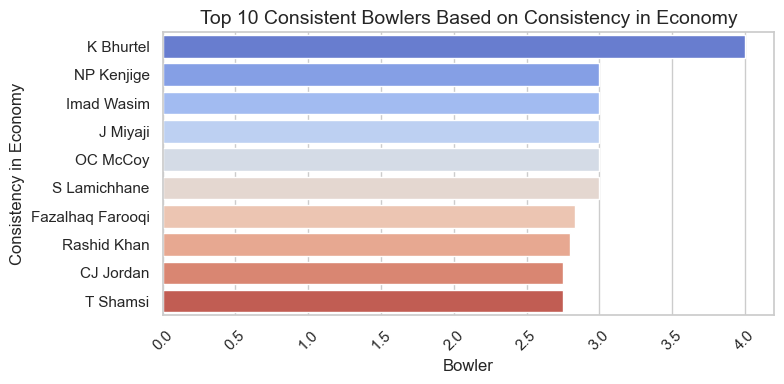

In [15]:
consistent_bowlers = deliveries[deliveries['wicket_type'].notnull()].groupby(['match_id', 'bowler']).size().groupby('bowler').mean().sort_values(ascending=False).head(10)
consistent_bowlers = consistent_bowlers.reset_index().rename(columns={"bowler": "Bowler", 0: 'Consistency in Economy'})
consistent_bowlers

plt.figure(figsize=(8,4))
sns.barplot(data=consistent_bowlers, y='Bowler', x='Consistency in Economy', palette='coolwarm')

plt.title('Top 10 Consistent Bowlers Based on Consistency in Economy', fontsize=14)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Consistency in Economy', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## TOP 10 Palyers In Powerplay, MiddleOvers,DeathOvers

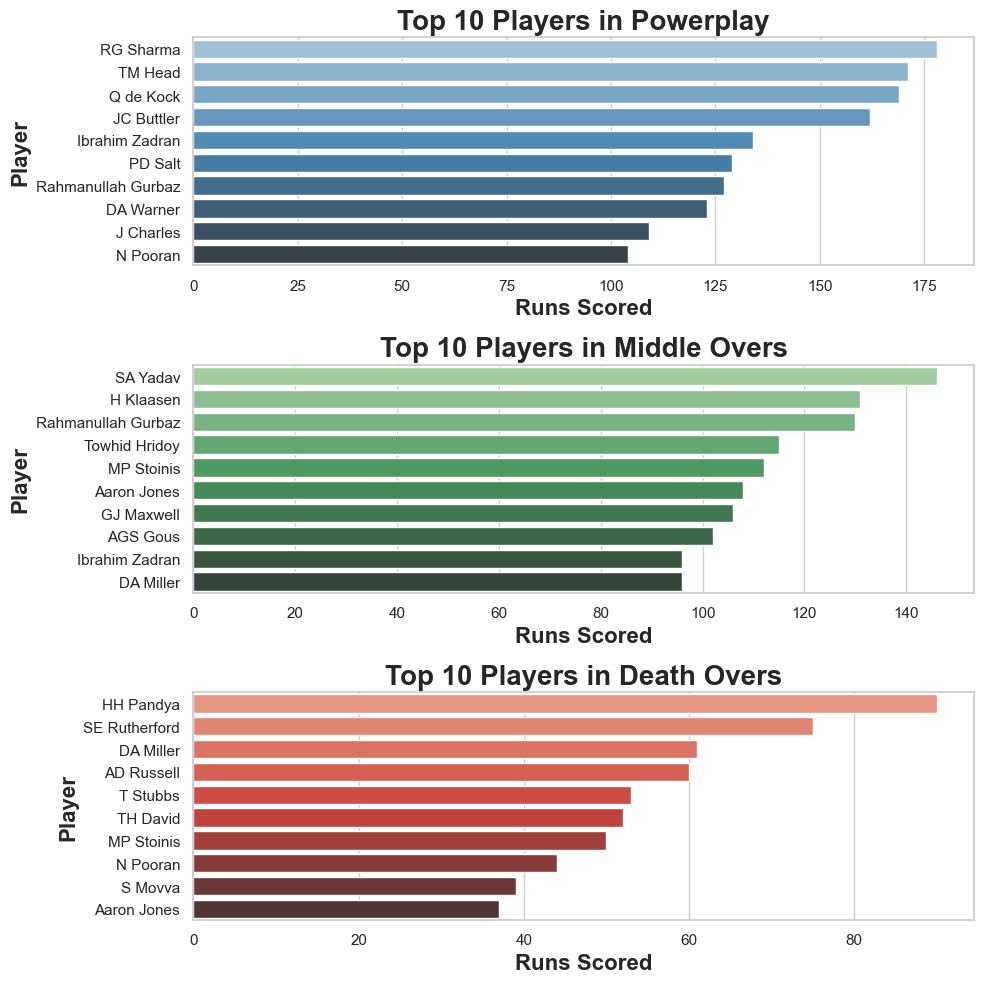

In [16]:
powerplay = deliveries[deliveries['ball'].between(0.1, 6.6)]
middle_overs = deliveries[deliveries['ball'].between(7.1, 15.6)]
death_overs = deliveries[deliveries['ball'].between(16.1, 20.6)]

powerplay_performance = powerplay.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
middle_overs_performance = middle_overs.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
death_overs_performance = death_overs.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
sns.set_style(style="whitegrid")

top10_powerplay = powerplay_performance.head(10).sort_values(ascending=False)
top10_middle_overs = middle_overs_performance.head(10).sort_values(ascending=False)
top10_death_overs = death_overs_performance.head(10).sort_values(ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(10,10))

sns.barplot(x=top10_powerplay.values, y=top10_powerplay.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Players in Powerplay', fontsize=20, weight='bold')
axes[0].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[0].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_middle_overs.values, y=top10_middle_overs.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Players in Middle Overs', fontsize=20, weight='bold')
axes[1].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[1].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_death_overs.values, y=top10_death_overs.index, ax=axes[2], palette="Reds_d")
axes[2].set_title('Top 10 Players in Death Overs', fontsize=20, weight='bold')
axes[2].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[2].set_ylabel('Player', fontsize=16, weight='bold')

plt.tight_layout()

plt.show()

# Batting Analysis

##  TOP 10 Team with Highest  Average Runs per Over


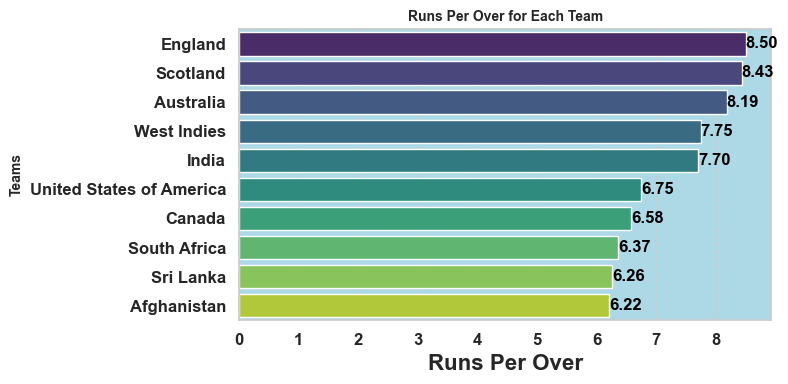

In [17]:
team_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()
team_balls = deliveries.groupby('batting_team').size()

runs_per_over = team_runs / (team_balls / 6)
most_runs_per_over = runs_per_over.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=most_runs_per_over.values, y=most_runs_per_over.index, palette='viridis')
plt.title('Runs Per Over for Each Team', fontsize=10, weight='bold')
plt.xlabel('Runs Per Over', fontsize=16, weight='bold')
plt.ylabel('Teams', fontsize=10, weight='bold')

for index, value in enumerate(most_runs_per_over.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

## Highest Partnerships of the Tournament

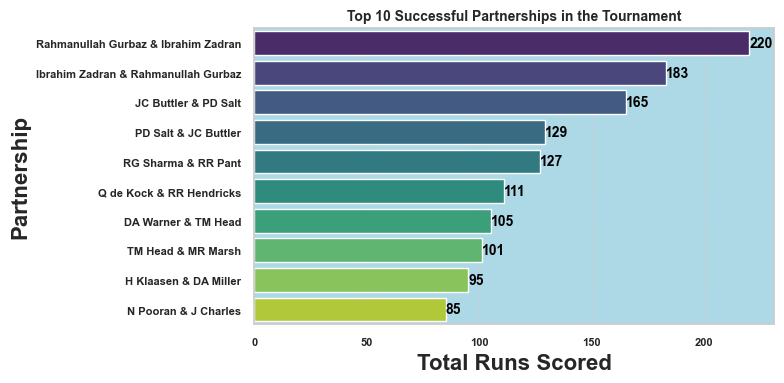

In [18]:
partnerships = deliveries.groupby(['match_id', 'striker', 'non_striker'])['runs_off_bat'].sum()

successful_partnerships = partnerships.groupby(['striker', 'non_striker']).sum().sort_values(ascending=False).reset_index()

top_partnerships = successful_partnerships.head(10)

top_partnerships['partnership'] = top_partnerships['striker'] + ' & ' + top_partnerships['non_striker']

plt.figure(figsize=(8,4))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=top_partnerships, x='runs_off_bat', y='partnership', palette='viridis')
plt.title('Top 10 Successful Partnerships in the Tournament', fontsize=10, weight='bold')
plt.xlabel('Total Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Partnership', fontsize=16, weight='bold')

plt.xticks(fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(top_partnerships['runs_off_bat']):
    plt.text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

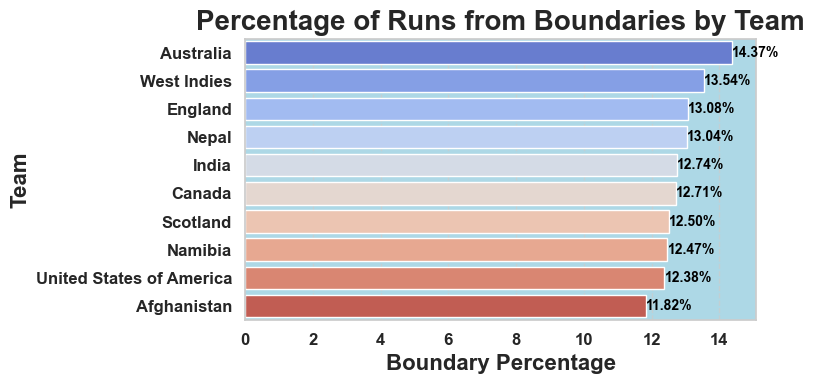

In [19]:
boundaries = deliveries[deliveries['runs_off_bat'].isin([4, 6])]
team_boundaries = boundaries.groupby('batting_team').size()
team_total_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()

boundary_percentage = (team_boundaries / team_total_runs) * 100

boundary_percentage = boundary_percentage.reset_index()
boundary_percentage.columns = ['batting_team', 'boundary_percentage']
boundary_percentage = boundary_percentage.sort_values(by='boundary_percentage', ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=boundary_percentage, x='boundary_percentage', y='batting_team', palette='coolwarm')
plt.title('Percentage of Runs from Boundaries by Team', fontsize=20, weight='bold')
plt.xlabel('Boundary Percentage', fontsize=16, weight='bold')
plt.ylabel('Team', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(boundary_percentage['boundary_percentage']):
    plt.text(value , index, f'{value:.2f}%', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

## Runs In Every Over


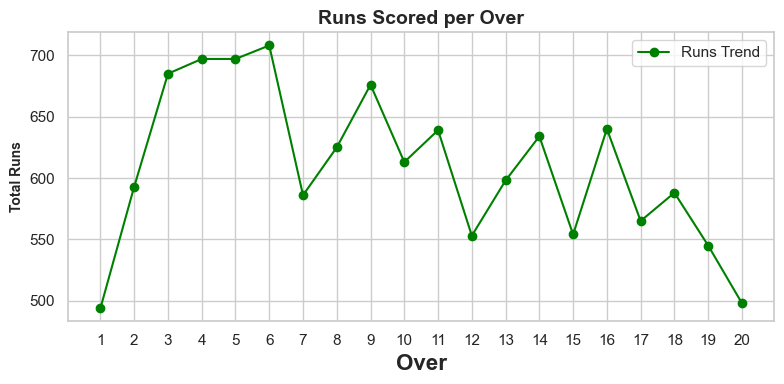

In [20]:

deliveries['over'] = (deliveries['ball'] // 1) + 1 
runs_per_over = deliveries.groupby('over')['runs_off_bat'].sum()
runs_per_over_filtered = runs_per_over[runs_per_over >= 400]

plt.figure(figsize=(8,4))
plt.plot(runs_per_over_filtered.index, runs_per_over_filtered.values, color='green', marker='o', linestyle='-', label='Runs Trend')
plt.xticks(range(1, 21))
plt.title('Runs Scored per Over', fontsize=14, weight='bold')
plt.xlabel('Over', fontsize=16, weight='bold')
plt.ylabel('Total Runs', fontsize=10, weight='bold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Percentage of DOT Balls by Each Team

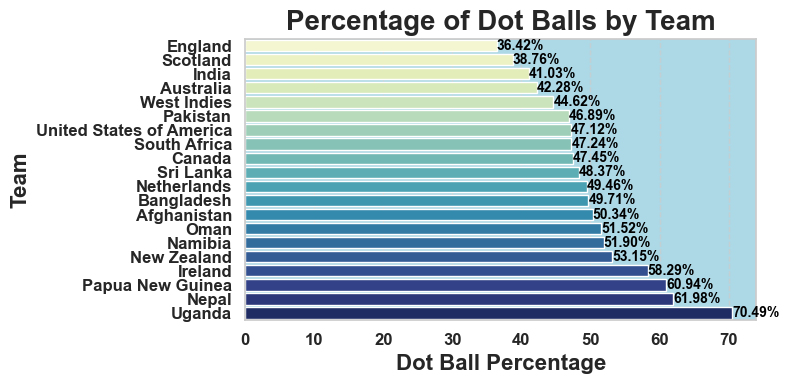

In [21]:
dot_balls = deliveries[deliveries['runs_off_bat'] == 0]
team_dot_balls = dot_balls.groupby('batting_team').size()

dot_ball_percentage = (team_dot_balls / team_balls) * 100

dot_ball_percentage = dot_ball_percentage.reset_index()
dot_ball_percentage.columns = ['batting_team', 'dot_ball_percentage']
dot_ball_percentage = dot_ball_percentage.sort_values(by='dot_ball_percentage', ascending=True)

plt.figure(figsize=(8,4))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=dot_ball_percentage, x='dot_ball_percentage', y='batting_team', palette='YlGnBu')
plt.title('Percentage of Dot Balls by Team', fontsize=20, weight='bold')
plt.xlabel('Dot Ball Percentage', fontsize=16, weight='bold')
plt.ylabel('Team', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(dot_ball_percentage['dot_ball_percentage']):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()
plt.show()

# Bowling Analysis

## Percentage of DOT balls in Each Match

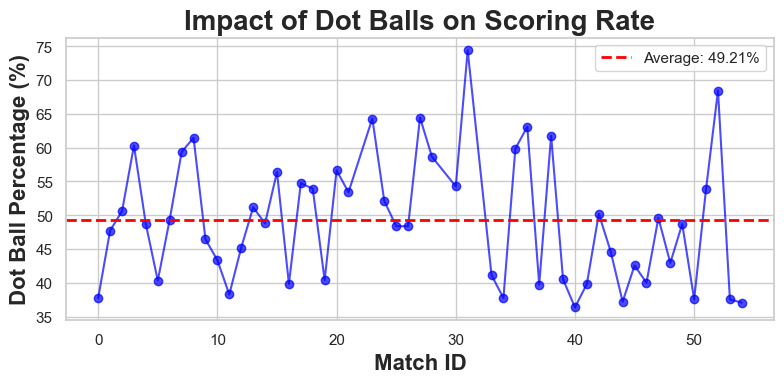

In [22]:
deliveries['is_dot'] = deliveries['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
dot_ball_impact = deliveries.groupby('match_id')['is_dot'].mean()
average_dot_percentage = dot_ball_impact.mean() * 100

plt.figure(figsize=(8,4))
plt.plot(dot_ball_impact.index, dot_ball_impact * 100, color='blue', marker='o', linestyle='-', alpha=0.7)
plt.axhline(y=average_dot_percentage, color='red', linestyle='--', linewidth=2, label=f'Average: {average_dot_percentage:.2f}%')
plt.xlabel('Match ID', fontsize=16, weight='bold')
plt.ylabel('Dot Ball Percentage (%)', fontsize=16, weight='bold')
plt.title('Impact of Dot Balls on Scoring Rate', fontsize=20, weight='bold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## DOT Balls in Every Over

### Total balls = 52 Matches * 2 Innings * 120 Balls (Approx) == 624 Balls 


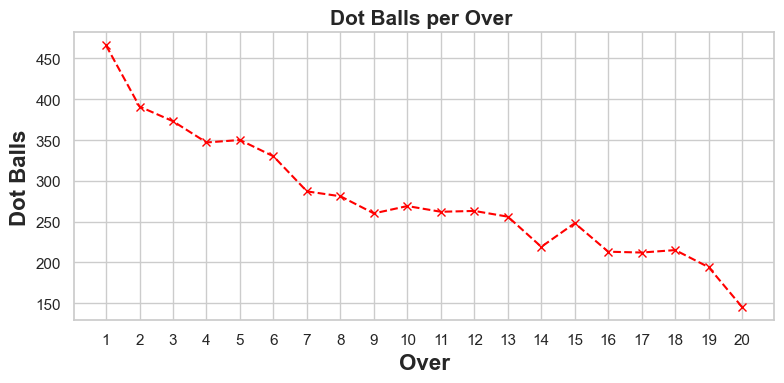

In [23]:

deliveries['over'] = (deliveries['ball'] // 1) + 1  
deliveries['is_dot'] = deliveries['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
dot_balls_per_over = deliveries.groupby('over')['is_dot'].sum()


plt.figure(figsize=(8,4))
plt.plot(dot_balls_per_over.index, dot_balls_per_over.values, color='red', marker='x', linestyle='--', label='Dot Balls Trend')
plt.xticks(range(1, 21))
plt.title('Dot Balls per Over ', fontsize=15, weight='bold')
plt.xlabel('Over', fontsize=16, weight='bold')
plt.ylabel('Dot Balls', fontsize=16, weight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()
